#ED Analysis

#Importing the libraries

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

#Reading the Data

In [16]:
df = pd.read_csv('/content/automobile (1).csv')

#Displaying the first 5 rows of the dataset

In [17]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


#Describe method

In [18]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


#Example of describe method

In [19]:
sr = pd.Series([35,40,45,35,42,30,44,39,38,45,30,46])

In [20]:
sr.describe()

count    12.000000
mean     39.083333
std       5.648143
min      30.000000
25%      35.000000
50%      39.500000
75%      44.250000
max      46.000000
dtype: float64

#Box Plot

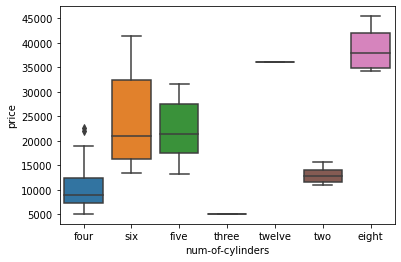

In [21]:
sns.boxplot(x='num-of-cylinders', y='price', data=df)

#Scatter Plot

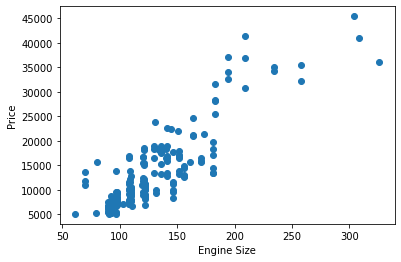

In [22]:
plt.scatter(df['engine-size'],df['price'])
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

#Histogram

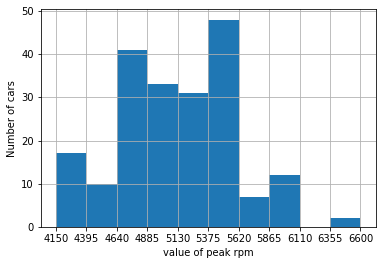

In [35]:
count, bin_edges = np.histogram(df['peak-rpm'])
df['peak-rpm'].plot(kind='hist', xticks=bin_edges)
plt.xlabel('value of peak rpm')
plt.ylabel('Number of cars')
plt.grid()
plt.show()

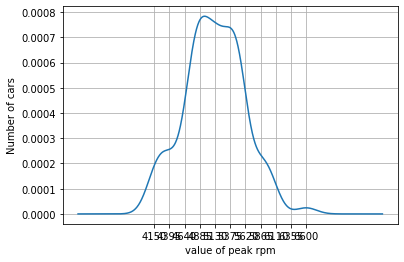

In [32]:
count, bin_edges = np.histogram(df['peak-rpm'])
df['peak-rpm'].plot(kind='kde', xticks=bin_edges)
plt.xlabel('value of peak rpm')
plt.ylabel('Number of cars')
plt.grid()
plt.show()

In [28]:
print(count)

[17 10 41 33 31 48  7 12  0  2]


In [29]:
print(bin_edges)

[4150. 4395. 4640. 4885. 5130. 5375. 5620. 5865. 6110. 6355. 6600.]


#ANOVA(Analysis of variance)

In [42]:
df[['make', 'price']].groupby(['make']).sum()


,price
make,
alfa-romero,46495.0
audi,107155.0
bmw,208950.0
chevrolet,18021.0
dodge,70879.0
honda,106401.0
isuzu,17833.0
jaguar,103800.0
mazda,181099.0


In [24]:
temp_df = df[['make', 'price']].groupby(['make']) 
stats.f_oneway(temp_df.get_group('audi')['price'],temp_df.get_group('volvo')['price'])

F_onewayResult(statistic=0.014303241552631388, pvalue=0.9063901597143602)

In [25]:
stats.f_oneway(temp_df.get_group('audi')['price'],temp_df.get_group('volvo')['price'])

F_onewayResult(statistic=0.014303241552631388, pvalue=0.9063901597143602)

#Correlation

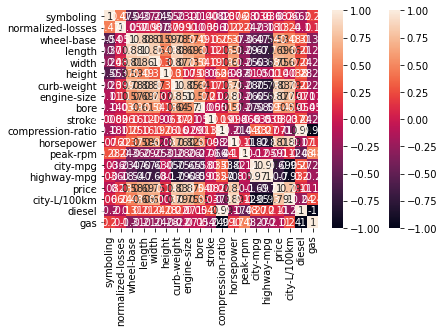

In [44]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
sns.heatmap(correlation_matrix, )
plt.show()

sns.replot(x='engine-size'), y='price', data=df

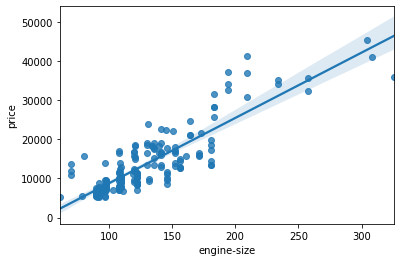

In [46]:
sns.regplot(x='engine-size', y='price', data=df)

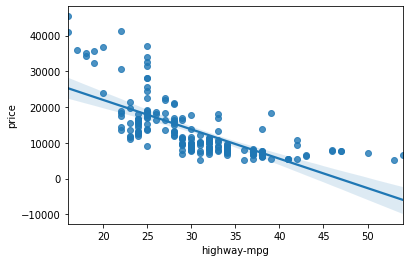

In [14]:
sns.regplot(x='highway-mpg', y='price', data=df)